In [1]:
import pandas as pd

import sys

import seaborn as sns

from sqlalchemy import create_engine

import mysql.connector as conn

from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
def getGraphic(dataframe):
    
    plt.figure(figsize=(10, 6))

    return sns.heatmap(dataframe.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [3]:
actor = pd.read_csv('data/actor.csv') 

category = pd.read_csv('data/category.csv')

film = pd.read_csv('data/film.csv')

inventory = pd.read_csv('data/inventory.csv')

language = pd.read_csv('data/language.csv')

rental = pd.read_csv('data/rental.csv')

hdd = pd.read_csv('data/old_HDD.csv')

<AxesSubplot:>

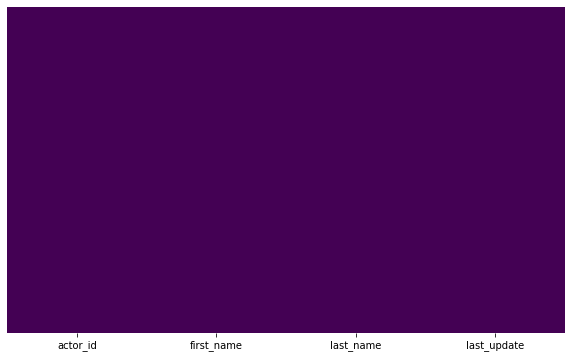

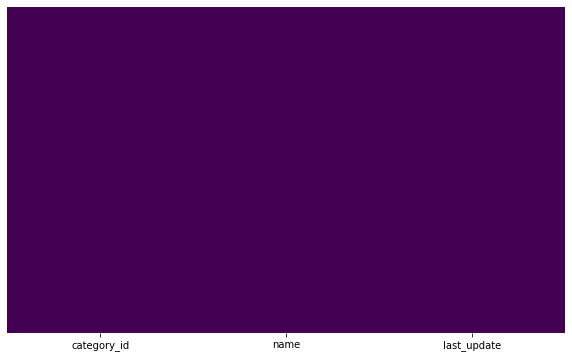

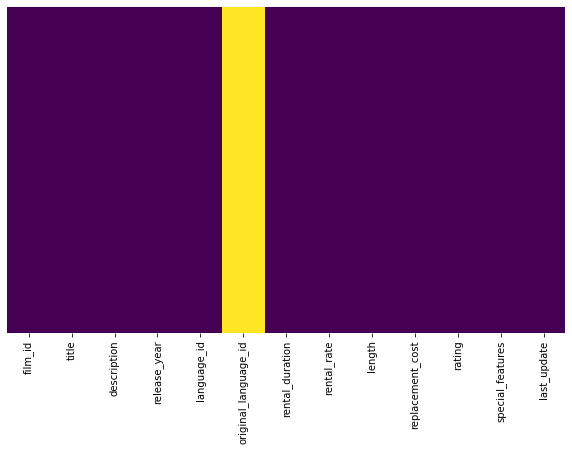

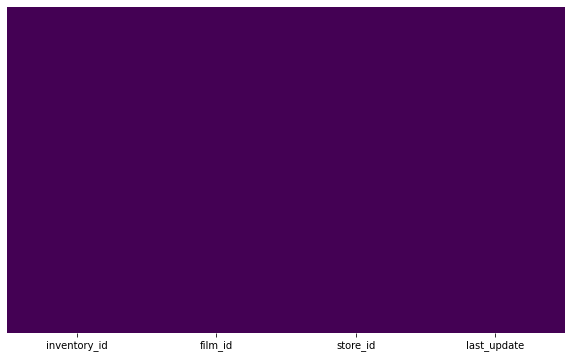

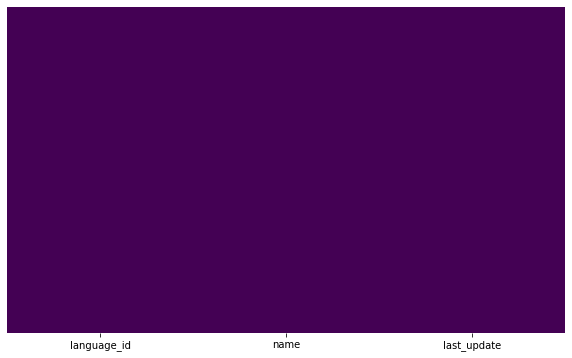

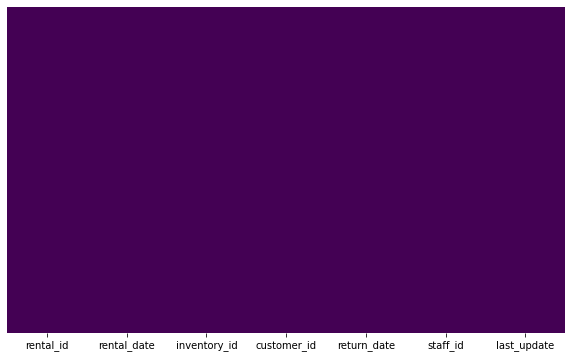

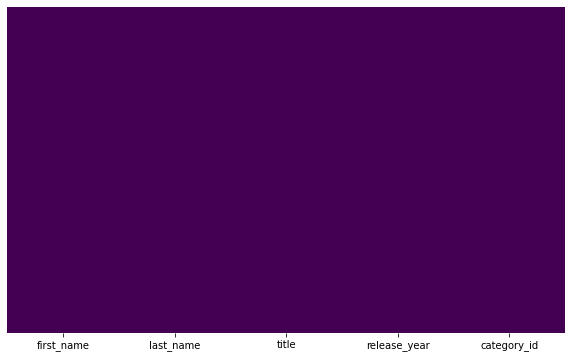

In [4]:
getGraphic(actor)
getGraphic(category)
getGraphic(film)
getGraphic(inventory)
getGraphic(language)
getGraphic(rental)
getGraphic(hdd)

In [5]:
actor['name_actor'] = actor.first_name + ' ' + actor.last_name

actor.drop_duplicates(subset = 'name_actor', inplace = True)

actor.reset_index(drop = True, inplace = True)

actor

,actor_id,first_name,last_name,last_update,name_actor
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,PENELOPE GUINESS
1,2,NICK,WAHLBERG,2006-02-15 04:34:33,NICK WAHLBERG
2,3,ED,CHASE,2006-02-15 04:34:33,ED CHASE
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33,JENNIFER DAVIS
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33,JOHNNY LOLLOBRIGIDA
...,...,...,...,...,...
194,196,BELA,WALKEN,2006-02-15 04:34:33,BELA WALKEN
195,197,REESE,WEST,2006-02-15 04:34:33,REESE WEST
196,198,MARY,KEITEL,2006-02-15 04:34:33,MARY KEITEL
197,199,JULIA,FAWCETT,2006-02-15 04:34:33,JULIA FAWCETT


In [6]:
hdd['name_actor'] = hdd.first_name + ' ' + hdd.last_name

hdd = hdd.groupby(['title','release_year','category_id']).agg({'name_actor': lambda x: x.tolist()}).reset_index()

hdd['name_actor'] = [', '.join(map(str, l)) for l in hdd['name_actor']]

hdd

,title,release_year,category_id,name_actor
0,ACADEMY DINOSAUR,2006,6,"PENELOPE GUINESS, CHRISTIAN GABLE, LUCILLE TRA..."
1,ACE GOLDFINGER,2006,11,BOB FAWCETT
2,ADAPTATION HOLES,2006,6,"NICK WAHLBERG, BOB FAWCETT, CAMERON STREEP"
3,AGENT TRUMAN,2006,9,"KIRSTEN PALTROW, SANDRA KILMER"
4,ALABAMA DEVIL,2006,11,"CHRISTIAN GABLE, ELVIS MARX, RIP CRAWFORD"
...,...,...,...,...
609,WRONG BEHAVIOR,2006,3,MILLA PECK
610,WYOMING STORM,2006,13,"BETTE NICHOLSON, WOODY HOFFMAN"
611,YOUNG LANGUAGE,2006,6,"ED CHASE, JULIA MCQUEEN"
612,YOUTH KICK,2006,12,"SANDRA KILMER, VAL BOLGER"


In [7]:
inventory_zero = {'inventory_id':0, 'film_id': 0, 'store_id': 0, 'last_update': '0000-00-00 00:00:00'}

inventory = inventory.append(inventory_zero, ignore_index = True, sort = True)

inventory

,film_id,inventory_id,last_update,store_id
0,1,1,2006-02-15 05:09:17,1
1,1,2,2006-02-15 05:09:17,1
2,1,3,2006-02-15 05:09:17,1
3,1,4,2006-02-15 05:09:17,1
4,1,5,2006-02-15 05:09:17,2
...,...,...,...,...
996,222,997,2006-02-15 05:09:17,2
997,222,998,2006-02-15 05:09:17,2
998,223,999,2006-02-15 05:09:17,2
999,223,1000,2006-02-15 05:09:17,2


In [8]:
category_zero = {'category_id':0, 'name': 'Unknown', 'last_update': '0000-00-00 00:00:00'}

category = category.append(category_zero, ignore_index = True)

category

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27
5,6,Documentary,2006-02-15 04:46:27
6,7,Drama,2006-02-15 04:46:27
7,8,Family,2006-02-15 04:46:27
8,9,Foreign,2006-02-15 04:46:27
9,10,Games,2006-02-15 04:46:27


In [9]:
rental.inventory_id[rental.inventory_id>1000] = 0

rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,0,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,0,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,0,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,0,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53
...,...,...,...,...,...,...,...
995,997,2005-05-31 00:08:25,0,216,2005-06-02 00:17:25,2,2006-02-15 21:30:53
996,998,2005-05-31 00:16:57,0,389,2005-06-01 22:41:57,1,2006-02-15 21:30:53
997,999,2005-05-31 00:25:10,0,413,2005-06-03 06:05:10,2,2006-02-15 21:30:53
998,1000,2005-05-31 00:25:56,0,332,2005-06-08 19:42:56,2,2006-02-15 21:30:53


In [10]:
film.dropna(axis = 1, inplace = True)

film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   film_id           1000 non-null   int64  
 1   title             1000 non-null   object 
 2   description       1000 non-null   object 
 3   release_year      1000 non-null   int64  
 4   language_id       1000 non-null   int64  
 5   rental_duration   1000 non-null   int64  
 6   rental_rate       1000 non-null   float64
 7   length            1000 non-null   int64  
 8   replacement_cost  1000 non-null   float64
 9   rating            1000 non-null   object 
 10  special_features  1000 non-null   object 
 11  last_update       1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [11]:
# Añado categoría

filmcat = film.set_index('title').join(hdd[["title", "category_id", "name_actor"]].set_index('title'), 
                                      lsuffix='', rsuffix='_dcha', how='left')

filmcat.reset_index(inplace = True)

# Añado id de inventario

filminv = filmcat.set_index('film_id').join(inventory[["film_id", "inventory_id"]].set_index('film_id'),
                                        rsuffix='_dcha', how='left')

filminv.reset_index(inplace = True)

# Añado las fechas de alquiler

filmren = filminv.set_index('inventory_id').join(rental[["rental_date", 'return_date', "inventory_id"]].
                                             set_index('inventory_id'), rsuffix='_dcha', how='left')

filmren.reset_index(inplace = True)

In [12]:
# Añado el idioma

datafilms = filmren.set_index('language_id').join(language[['name','language_id']].
                                             set_index('language_id'), rsuffix='_dcha', how='left')

datafilms.rename(columns={"name": "language"}, inplace = True)

datafilms.reset_index(inplace = True)

datafilms.drop('language_id', axis = 1, inplace = True)

datafilms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inventory_id      1000 non-null   float64
 1   film_id           1793 non-null   int64  
 2   title             1793 non-null   object 
 3   description       1793 non-null   object 
 4   release_year      1793 non-null   int64  
 5   rental_duration   1793 non-null   int64  
 6   rental_rate       1793 non-null   float64
 7   length            1793 non-null   int64  
 8   replacement_cost  1793 non-null   float64
 9   rating            1793 non-null   object 
 10  special_features  1793 non-null   object 
 11  last_update       1793 non-null   object 
 12  category_id       1137 non-null   float64
 13  name_actor        1137 non-null   object 
 14  rental_date       212 non-null    object 
 15  return_date       212 non-null    object 
 16  language          1793 non-null   object 


<AxesSubplot:>

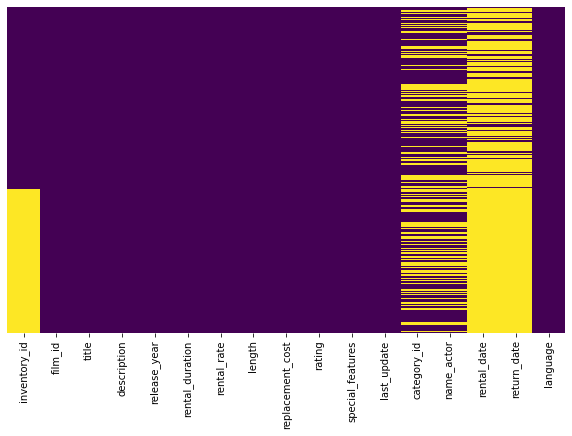

In [13]:
getGraphic(datafilms)

In [14]:
datafilms.inventory_id.fillna(0, inplace = True)

datafilms.category_id.fillna(0, inplace = True)

datafilms.name_actor.fillna('UNKNOWN', inplace = True)

datafilms.rental_date.fillna('0000-00-00 00:00:00', inplace = True)

datafilms.return_date.fillna('0000-00-00 00:00:00', inplace = True)

datafilms = datafilms[['film_id', 'title', 'description', 'release_year',
       'rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'special_features', 'last_update', 'category_id',
       'name_actor', 'inventory_id', 'rental_date', 'return_date', 'language']]

datafilms.sort_values(by = ['title'], inplace = True)

films_col = ['film_id', 'title', 'name_actor','description', 'release_year',
             'length','category_id','language','rating','special_features',
             'rental_duration', 'rental_rate', 'replacement_cost', 'last_update','rental_date', 'return_date']

datafilms.category_id = datafilms.category_id.astype(int)

datafilms.inventory_id = datafilms.inventory_id.astype(int)

datafilms = datafilms.groupby(films_col).agg({'inventory_id': lambda x: x.tolist()}).reset_index()

In [15]:
datafilms.head()

,film_id,title,name_actor,description,release_year,length,category_id,language,rating,special_features,rental_duration,rental_rate,replacement_cost,last_update,rental_date,return_date,inventory_id
0,1,ACADEMY DINOSAUR,"PENELOPE GUINESS, CHRISTIAN GABLE, LUCILLE TRA...",A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,English,PG,"Deleted Scenes,Behind the Scenes",6,0.99,20.99,2006-02-15 05:03:42,0000-00-00 00:00:00,0000-00-00 00:00:00,"[1, 3, 4, 5, 7, 8]"
1,1,ACADEMY DINOSAUR,"PENELOPE GUINESS, CHRISTIAN GABLE, LUCILLE TRA...",A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,English,PG,"Deleted Scenes,Behind the Scenes",6,0.99,20.99,2006-02-15 05:03:42,2005-05-27 07:03:28,2005-05-31 08:01:28,[6]
2,1,ACADEMY DINOSAUR,"PENELOPE GUINESS, CHRISTIAN GABLE, LUCILLE TRA...",A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,English,PG,"Deleted Scenes,Behind the Scenes",6,0.99,20.99,2006-02-15 05:03:42,2005-05-30 20:21:07,2005-06-06 00:36:07,[2]
3,2,ACE GOLDFINGER,BOB FAWCETT,A Astounding Epistle of a Database Administrat...,2006,48,11,English,G,"Trailers,Deleted Scenes",3,4.99,12.99,2006-02-15 05:03:42,0000-00-00 00:00:00,0000-00-00 00:00:00,"[11, 9, 10]"
4,3,ADAPTATION HOLES,"NICK WAHLBERG, BOB FAWCETT, CAMERON STREEP",A Astounding Reflection of a Lumberjack And a ...,2006,50,6,English,NC-17,"Trailers,Deleted Scenes",7,2.99,18.99,2006-02-15 05:03:42,0000-00-00 00:00:00,0000-00-00 00:00:00,"[12, 13, 14, 15]"


In [16]:
category.to_csv('data/cleaned_data/category.csv')

inventory.to_csv('data/cleaned_data/inventory.csv')

actor.to_csv('data/cleaned_data/actor.csv')

language.to_csv('data/cleaned_data/language.csv')

rental.to_csv('data/cleaned_data/rental.csv')

hdd.to_csv('data/cleaned_data/hdd.csv')

film.to_csv('data/cleaned_data/film.csv')

In [17]:
crea_db=conn.connect(host='localhost', user='root', passwd='10081973')

cursor=crea_db.cursor()

cursor.execute('drop database if exists datafilms;')

cursor.execute('create database datafilms;')

In [18]:
cursor.execute('show databases;')

for x in cursor:
    
    print(x)

('datafilms',)
('information_schema',)
('mysql',)
('performance_schema',)
('prueba',)
('sys',)


In [19]:
cursor.execute('use datafilms;')

In [20]:
db=conn.connect(host='localhost', user='root', passwd='10081973', database='datafilms')

cursor=db.cursor()

In [21]:
def insert(df, table):
    
    for i in range(len(df)):
    
        insert_query='insert into {} ({}) values {};'\
        .format(table, ','.join(df.columns), tuple(df.iloc[i].values))    
    
        insert_query=f"insert into {table} ({','.join(df.columns)}) values {tuple(df.iloc[i].values)};"
    
        cursor.execute(insert_query)
    
    db.commit()

In [22]:
cursor.execute('drop table if exists category;')

tabla = '''
            create table category (
            
            category_id int primary key,
            
            name varchar(50),
            
            last_update datetime
            
        );
'''
cursor.execute(tabla)

insert(category,'category')

In [23]:
cursor.execute('drop table if exists actor;')

tabla = '''
            create table actor (
            
            actor_id int,
            
            first_name varchar(50),
            
            last_name varchar(50),
            
            last_update datetime,
            
            name_actor varchar(100) primary key
            
        );
'''
cursor.execute(tabla)

insert(actor,'actor')

In [24]:
cursor.execute('drop table if exists inventory;')

tabla = '''

            create table inventory (
            
            inventory_id int primary key,
            
            film_id int,
            
            store_id int,
            
            last_update datetime
            
        );
'''
cursor.execute(tabla)

insert(inventory,'inventory')

In [25]:
cursor.execute('drop table if exists language;')

tabla = '''

            create table language (
            
            language_id int primary key,
            
            name varchar(25),
            
            last_update datetime
            
        );
'''
cursor.execute(tabla)

insert(language,'language')

In [26]:
cursor.execute('drop table if exists film;')

tabla = '''
            create table film (
            
            film_id int,
            
            title varchar(50) primary key,
            
            description varchar(255),
            
            release_year int,
            
            language_id int,
            
            foreign key (language_id) references language(language_id),

            rental_duration int,
            
            rental_rate float,
            
            length int,
            
            replacement_cost float,
            
            rating varchar(50),
            
            special_features varchar(255),
            
            last_update datetime
            
        );
'''
cursor.execute(tabla)

insert(film,'film')

In [27]:
cursor.execute('drop table if exists rental;')

tabla = '''

            create table rental (
            
            rental_id int,
            
            rental_date datetime,

            inventory_id int,
            
            foreign key (inventory_id) references inventory(inventory_id),
            
            customer_id int,
            
            return_date datetime,
            
            staff_id int,
            
            last_update datetime
            
        );
'''
cursor.execute(tabla)

insert(rental,'rental')

In [28]:
cursor.execute('drop table if exists hdd;')

tabla = '''

            create table hdd (
            
            title varchar(50),
            
            foreign key (title) references film(title),
            
            release_year int,
            
            category_id int,
            
            foreign key (category_id) references category(category_id),
            
            name_actor varchar(100)
            
        );
'''
cursor.execute(tabla)

insert(hdd,'hdd')